# Basic ML Algorithms - (Regression) - Day 4

This notebook will take a deep-dive into regression algorithms, how they work, and the different types.

**Topics:**



1.   Regression Algorithms
2.   Interpreting Model Results
3.   Linear vs Logistic Regression



**Goals:**



1.   Become familiar with different types of regression algorithms.
2.   Identify linear and nonlinear relationships from a scatterplot.
3.   Predict a response from a simple linear regression model.
4.   Predict a response from a multiple linear regression model.
5.   Calculate and interpret a residual.
6.   Distinguish Linear and Logistic Regression.



## Import Packages

The first part of every script!

1.  **Pandas:** Working with datasets. Arguably the most widely-used data-science Python package.

2.  **NumPy:** Scientific computing package for working with vectors & matrices.

3.  **MatplotLib:** Tool for dataset vizualizations.

4.  **Seaborn:** Tool for dataset vizualizations.

5.  **StatsModels:** Open-source ML algorithms.

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from statsmodels.formula.api import ols

## Explore Dataset

In this section we will begin to examine linear relationships in our data and how to visualize + interpret these findings.

**Basic EDA & Visualizations**

In [1]:
# Read-in housing csv, print shape
## TODO: YOUR CODE HERE ##

In [2]:
# Examine data-types (.info method!)

## TODO: YOUR CODE HERE ##

In [3]:
# Examine null values (.isnull method!)

## TODO: YOUR CODE HERE ##

In [4]:
# Examine numerical attributes (.describe method!)

## TODO: YOUR CODE HERE ##

In [5]:
# Examine Dependent & Independent (x, y) Variables

fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(data=data, x='lotsize', ax=ax[0])
sns.histplot(data=data, x='price', ax=ax[1]);

**The Scatter Plot**

***The classic visualization to show the relationship between two quantitative variables is called a scatter plot.***

In a scatterplot, we plot the value of the indepdendent variable and the value of the dependent variable as an (x,y) pair.  

For example, the first observation would be plotted by moving right on the x-axis to 5850 and up along the y-axis direction to 42000. 

Where x=lotsize & y=price.

In [6]:
# Examine first sample (.iloc method!)
## TODO: YOUR CODE HERE ##

In [7]:
## Visualize all features as (x,y) correlation pairs

# sns.pairplot(data)

For now, we are only interested in price & lotsize. We want to see if there is a linear-relationship between the lotsize and the price.

Simple linear regression measures the relationship between one quantitative feature, a quantitative target.

In [8]:
# Plot the scatter plot of lotsize (x) and price (y)
## TODO: YOUR CODE HERE ##

**There appears to be a positive linear relationship.** As we expected - because as the lotsize goes up, generally the price does as well.



How strongly correlated are the lotsize & price?

## Correlation & Linear Relationships

The linear correlation coefficient (pearson correlation) (r) measures the strength and direction of the linear relationship between two quantitative variables.

- Correlation is measured on a scale of -1 to 1. -1 = perfect negative correlation, +1 = perfect positive correlation, 0 = no correlation.
- A correlation |r| > 0.80 is considered strong and a correlation |r| < 0.20 is considered weak.

In [9]:
# Calculate correlation coefficient
## TODO: YOUR CODE HERE ##

This tells us that the correlation between x and x is 1, and between y and y is 1 (those are the numbers on the diagonal).  The correlation between x and y is 0.54 and the correlation between y and x is 0.54

**The linear correlation between lotsize and price is 0.54.**

This doesn't quite qualify as a strong correlation |r| > 0.80 but it's not weak either |r| < 0.20.  We'll say it's moderate!

Let's look at some other scatterplot patterns and values of correlation for comparison.

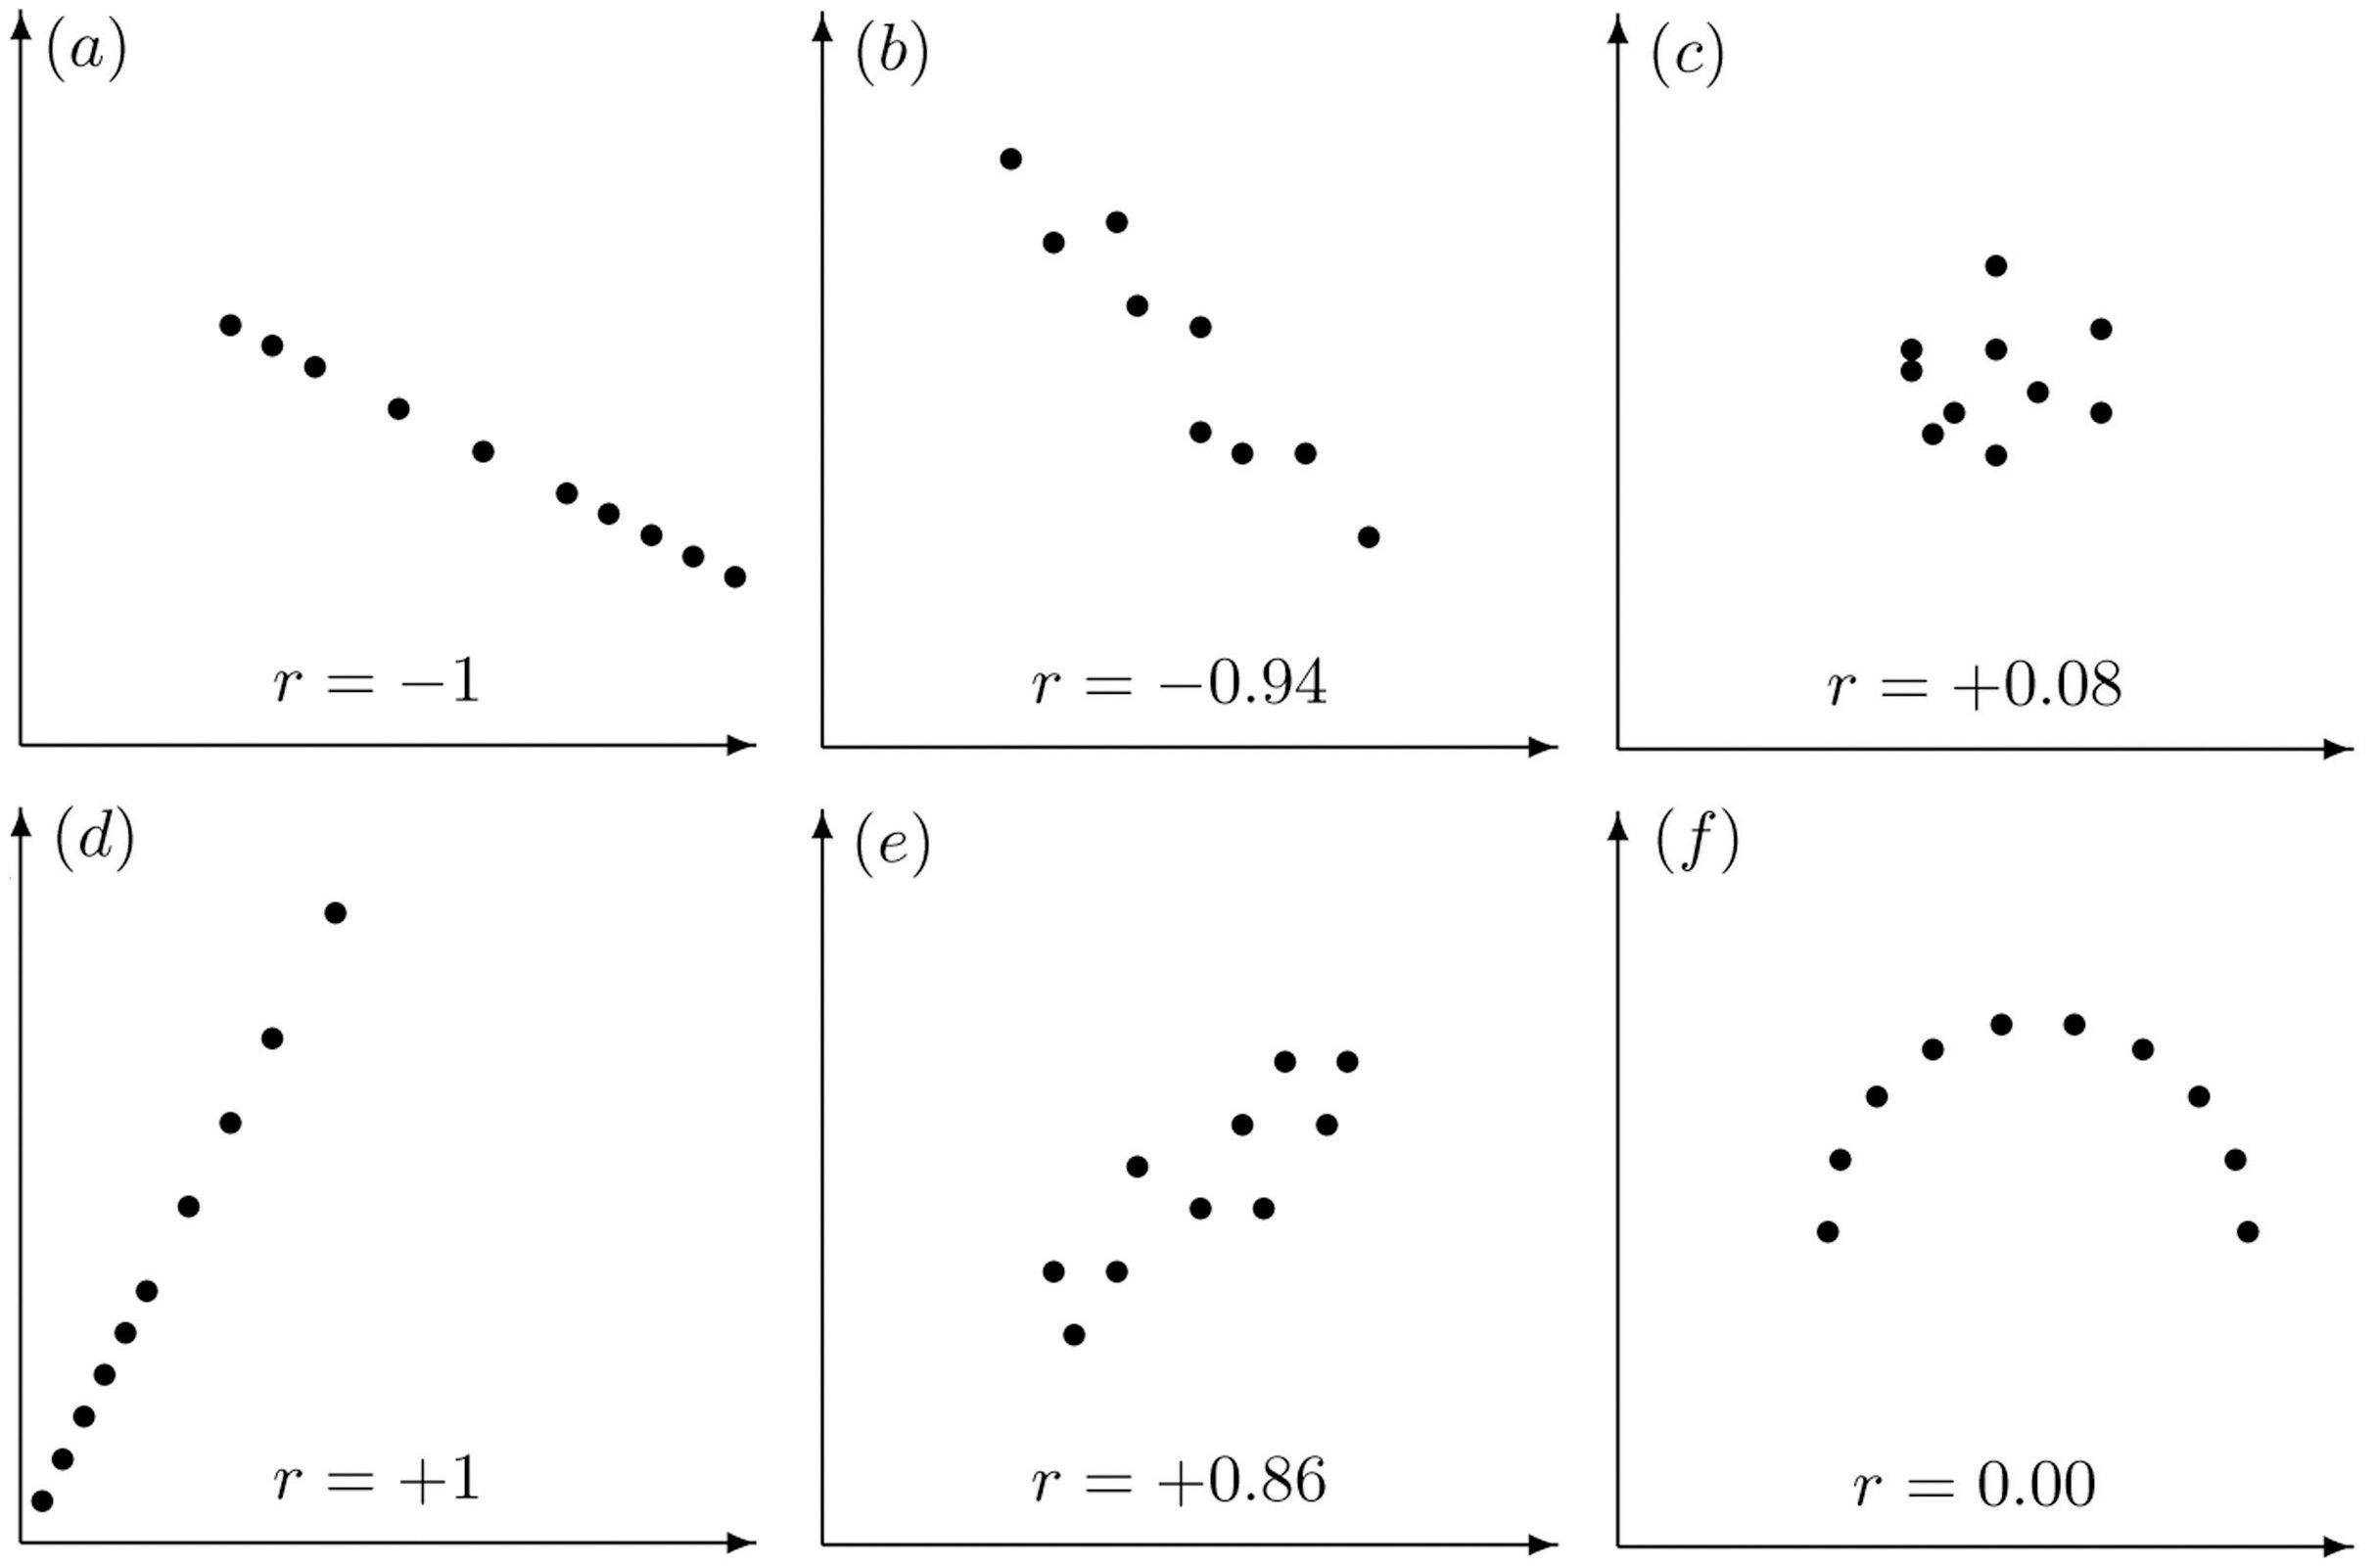

**How do we calculate the pearson correlation 'r'?**

A bit beyond the scope of this course, but feel free to do research yourselves!

This is from the NumPy documentation.

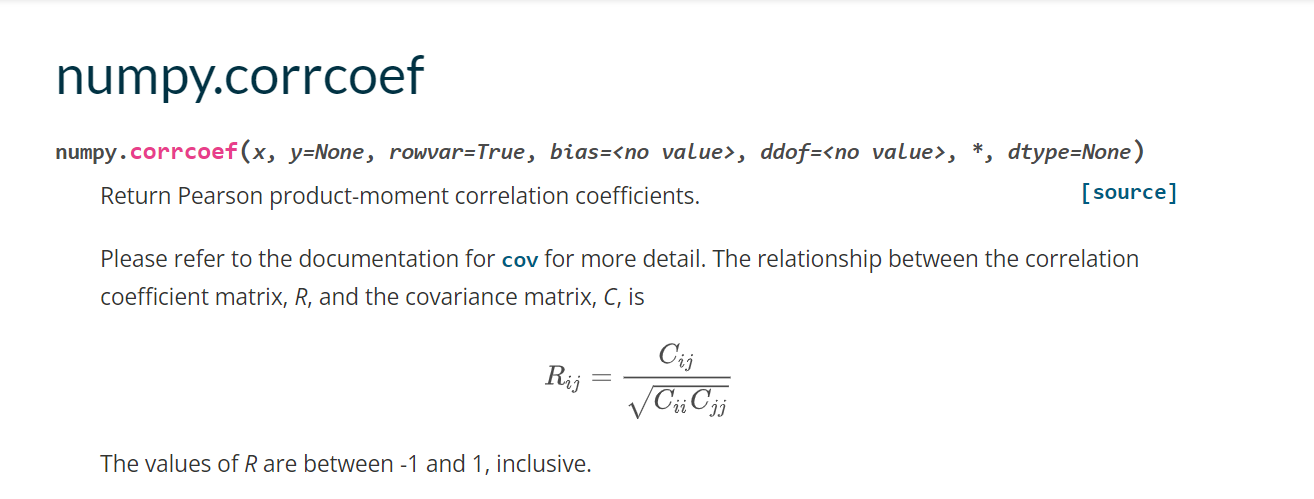

Correlation tells us if there is a linear relationship, and if so, how strongly correlated the two quantitative variables are.

However, we would like to go one step further and see if we can make predictions for the property price, given the lotsize.

We are going to do this by calculating the ***least squares*** regression line (also known as the line of best fit) for the data.

When dealing with real data, the points in a scatterplot will never line up perfectly.  The best model of the relationship between the two variables is the straight line that comes closest to passing through all the points (knowing that it won't actually hit all of them).

The least squares regression line is the function that minimizes the distance from every observed point to the predicted point. This fact has been mathematically proven, although we won't do that here.

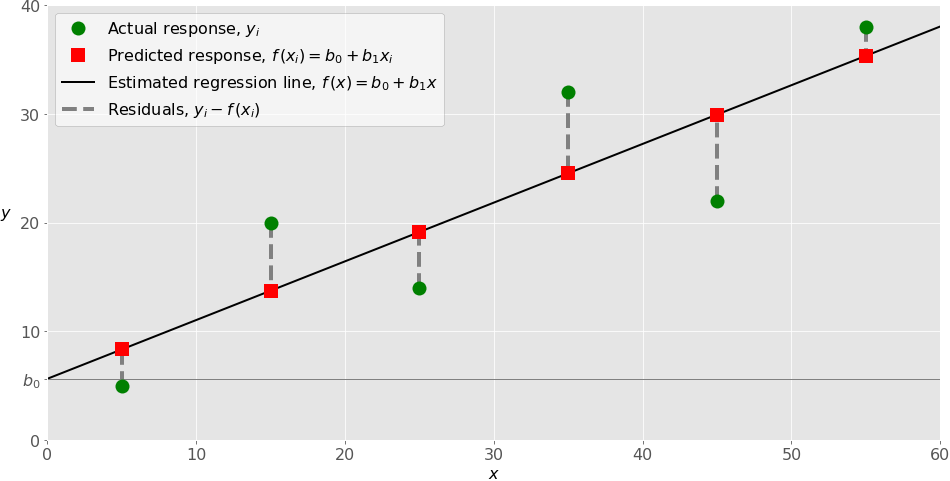

Remember, linear regression has the form: 

\begin{equation}
\hat{y} = \beta_{1}\ast X_{1}+...\beta_{n}\ast X_{n} + \beta_{0}
\end{equation}

**OLS Regression:**

\begin{equation}
\beta_{i} = \frac{\sum_{i}^{n}(X_{i}-\bar{X})(Y_{i}-\bar{Y})}{\sum_{i}^{n}(X_{i}-\bar{X})^{2}}
\end{equation}

Remember, X is just a feature (in our case lotsize), and y is the target (price). 
 
\begin{equation}
\bar{X} = \text{mean of feature X}
\end{equation}
\begin{equation}
X_{i} = \text{value at index i of feature X}
\end{equation}
\begin{equation}
\sum_{i}^{n} = \text{summation of all samples i to n}
\end{equation}

Remember our lesson on the importance of open-source software. This is precisely why. Instead of coding an OLS regression from scratch using that formula, we can use an open-source package (statsmodels) and not worry about all the math!

As long as we understand what is happenning, and we can interpret the results, there is no reason beyond education to code that from scratch.

### Example 1 - Housing Dataset

In [10]:
# create ols model in format y ~ x
## TODO: YOUR CODE HERE ##

We can write the linear regression model for the relationship between lotsize and price as:

\begin{equation}
\hat{Y} = 34136.19 + (6.59 * X)
\end{equation}

What do these numbers mean, exactly?  

- The **slope** tells us the expected change in y for one-unit change in x.
- The **intercept** tells us the expected value of y when x = 0.




\begin{equation}
\text{Where:}
\end{equation}
\begin{equation}
\text{intercept} = \beta_{0} = 34136.
\end{equation}
\begin{equation}
\text{slope} = \beta_{i} = 6.59
\end{equation}

This means we can expect roughly a $6.59 increase in price for each increment of +1 in lot-size.

**Visualize The Model**

In [11]:
# Plot the ols regression line using seaborn
## TODO: YOUR CODE HERE ##

**Test The Model.**

A property has a lot size of 5200, we want to predict the price.

In [12]:
# Utilize model params to make a prediction
## TODO: YOUR CODE HERE ##

A property with a lot-size of 5200 should cost roughly $68,449.78

**Calculate The Residual**

Let's calculate the residual for the first sample

In [13]:
# View first sample
## TODO: YOUR CODE HERE ##

In [14]:
# Calculate the residual for our ols model
## TODO: YOUR CODE HERE ##

Our model has overestimated the cost by about $31,000. 

Some models residuals will be smaller than this - all models are different!

This is why having **good data** is so vital. 

### Example 2 - Sleep Dataset

**Read-in Data**

In [15]:
# Read-in sleep dataset, show head
## TODO: YOUR CODE HERE ##

We will try to predict total-sleep from para-sleep.

**Explore Linear Relationships in Data**

In [16]:
sns.pairplot(data)

**Define Model**

In [17]:
# create ols model in format y ~ x
## TODO: YOUR CODE HERE ##

**Make Predictions & Calculate Residual**

In [18]:
# View first sample
## TODO: YOUR CODE HERE ##

In [19]:
# Calculate the residual for our ols model
## TODO: YOUR CODE HERE ##

Our model overestimated the amount of sleep by about 2.6

Pretty, close! Not bad.

### Example 3 - Multiple Regression

In the previous section we went over how to do a simple linear regression. We have one feature and one target.

In a multiple regression we have multiple features. Recall the **linear regression form**:

\begin{equation}
\hat{y} = \beta_{0} + \beta_{i} * X_{i} + ...\beta_{n}*X_{n}
\end{equation}

**Single Regression**

\begin{equation}
\hat{y} = \beta_{0} + \beta_{1} * X_{1}
\end{equation}

Where we have one coefficient and one feature.

**Multiple Regression**

\begin{equation}
\hat{y} = \beta_{0} + \beta_{1} * X_{1} + ...\beta_{n}*X_{n}
\end{equation}

Where we have multiple coefficients and multiple features.

We can do a brief examination of our pairplot and interpret right away some features with a linear correlation.

For example: SWSleep & TotalSleep, Gest & Life.

**Read-in Data**

In [20]:
# Read-in sleep dataset, show head
## TODO: YOUR CODE HERE ##

**Examine Extent of High Correlations**

In [21]:
## TODO: YOUR CODE HERE ##

In [22]:
## TODO: YOUR CODE HERE ##

In [23]:
## TODO: YOUR CODE HERE ##

**Define Model**

In [24]:
# create ols model in format y ~ x1 + x2
## TODO: YOUR CODE HERE ##

In [25]:
# model.summary()

We can see the R2 score is ~0.64, pretty good. We can think of the R2 score as the linear regression "accuracy" - how well did the line fit. Scored from -1 to 1.

**How do we calculate R2 score?**

\begin{equation}
R2 = \frac{SSR}{SST} = \frac{\sum_{i}^{n}{(\hat{y_{i}}-\bar{y}})^{2}}{\sum_{i}^{n}(y_{i}-\bar{y})^{2}}
\end{equation}

**Make Predictions & Calculate Residual**

In [26]:
# Examine first sample
## TODO: YOUR CODE HERE ##

In [27]:
# Calculate the residual for our multiple-ols model
## TODO: YOUR CODE HERE ##

## Linear vs Logistic Regression

In the world of ML, you will hear both of these terms often. They are extremely similar, with only one small operation separating the two.

**Linear Regression**

\begin{equation}
\hat{y} = \beta_{0} + \beta_{1} * X_{1} + ...\beta_{n}*X_{n}
\end{equation}

**Logistic Regression**

\begin{equation}
\hat{y} = \sigma(\beta_{0} + \beta_{i} * X_{i} + ...\beta_{n}*X_{n})
\end{equation}

The only difference is that we are wrapping the output of a linear-regression model in another function, denoted by the sigma. This is called the "activation" function.

We are calculating the "logits", more specifically, we are squeezing the output between 0 and 1. This is a hyper-parameter of a ML algorithm, in this example (and one of the most common activation functions) we are using the sigmoid activation.

Logistic regression is utilized for binary classification tasks.

**Example**

In [28]:
def sigmoid(x):
    sig = 1 / (1 + np.exp(-x))
    return sig

linear_out = y_hat
logistic_out = sigmoid(y_hat)

print('LINEAR REG: ', y_hat)
print('LOGISTIC REG: ', logistic_out)

As you can see, the output value was squeezed between 0 and 1.

In practice, when we pass in a vector to the sigmoid function (because we would have an output for each class), the operation is element-wise, which means it is applied to each element in the vector. 

**Sigmoid Function**

\begin{equation}
\text{sigmoid} = \frac{1}{1+e^{-x}}
\end{equation}

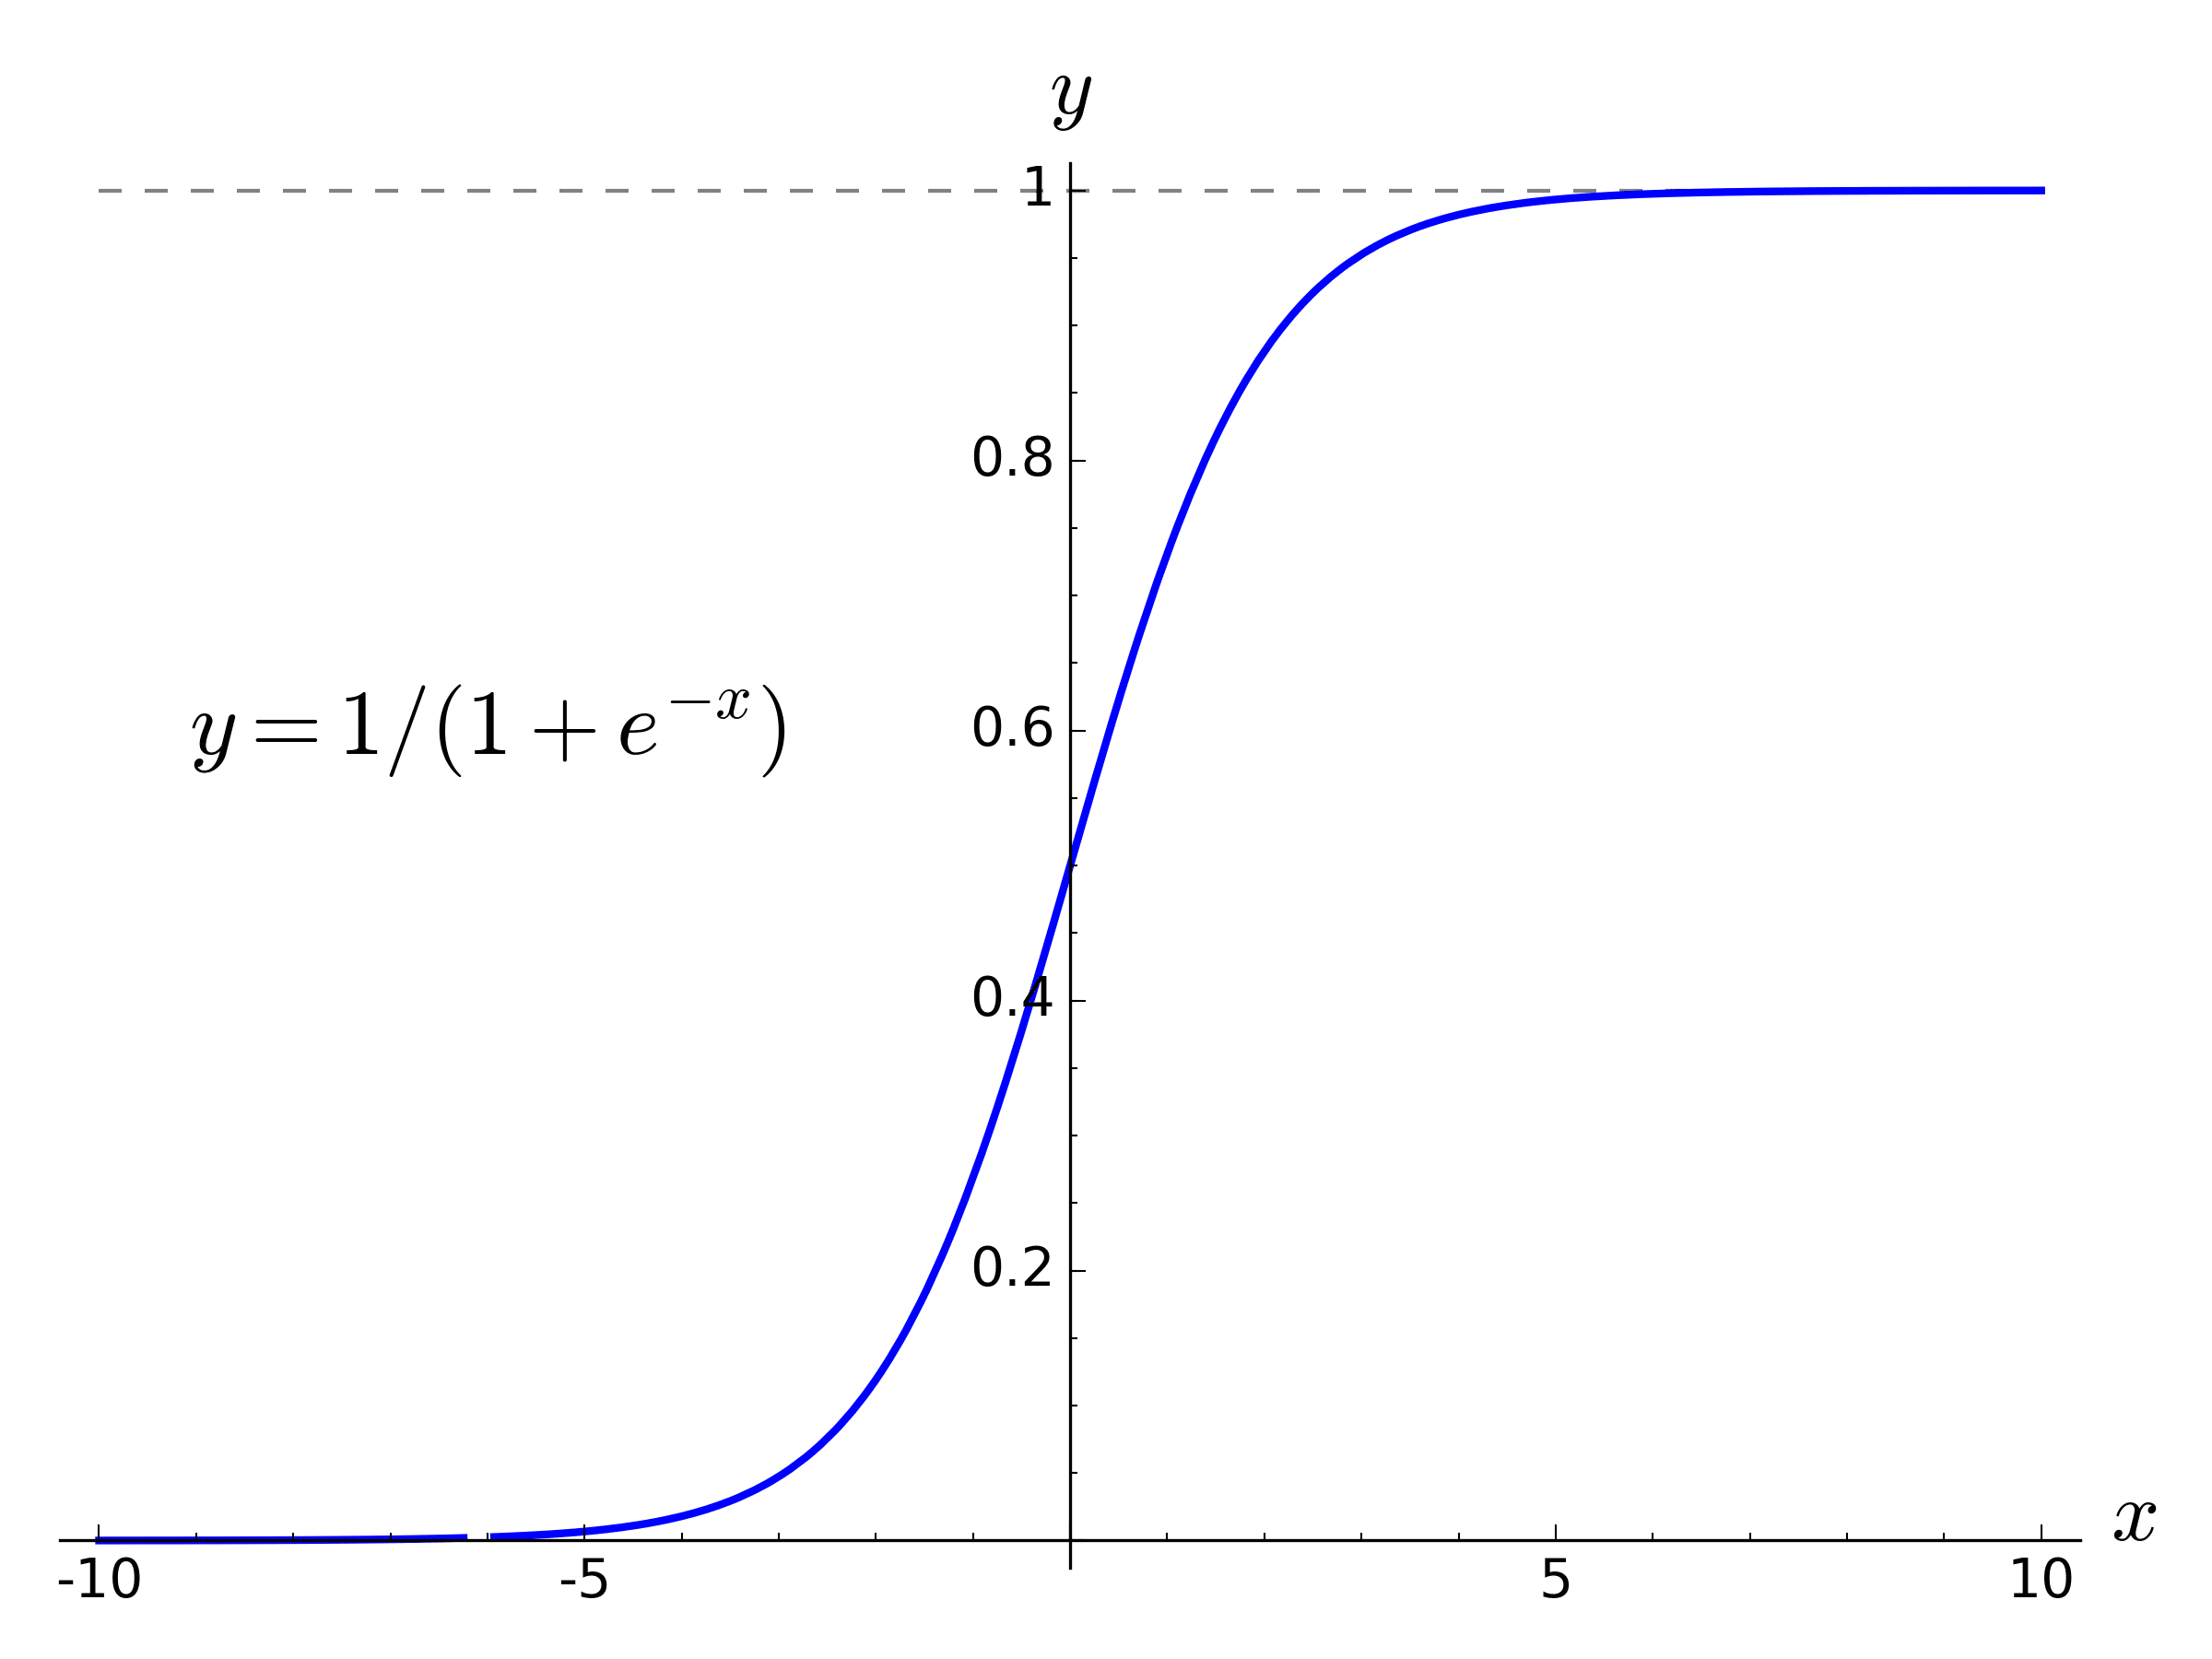

One of the most prevalent computations in AI.

## Conclusion

**Question 1:**

What is the residual if my model predicted 12 but the true value is 18?



1.   30
2.   6
3.   -6





**Question 2:**

If the correlation coefficent (r) is less about 0.5, what does this tell us about our two variables?


1.   They are positively correlated
2.   They are negatively correlated
3.   There is no correlation




**Question 3:**

Given a sample from our feature vector with a value of 6.4 - calculate the prediction for a slope of 2 and intercept at 16


1.   30.8
2.   38.4
3.   24.4





**Question 4:**

What is a scatter plot?


1.   A plot of the values in one feature
2.   A plot of the values in two features
3.   A plot of the values in one feature on the x-axis, and the target on the y-axis




**Bonus - Question 5:**

Define a function that calculates the slope using the OLS regression formula

In [ ]:
## TODO: YOUR CODE HERE ##